In [6]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt


In [17]:
bounds = [(-1000, 1000), (-10, 10), (-50, 50)]

def objective_function(params):
    # Here you would perform the physical experiment to get the viability
    viability = float(input(f"Enter the viability for params {params}: "))
    return -viability  # Assuming higher viability is better, we minimize the negative

# Callback to enforce 15 evaluations per generation
def generation_callback(xk, convergence):
    print(f"Generation {generation_callback.counter}: {len(xk)} evaluations")
    generation_callback.counter += 1

generation_callback.counter = 1

# Run differential evolution with a fixed population of 15 individuals
result = differential_evolution(
    objective_function,
    bounds,
    popsize=5,  # Ensures total population size is 15 (3 dimensions * 5 = 15)
    callback=generation_callback,
    strategy='best1bin',
    maxiter=10,  # Number of generations
)

print("Optimization complete")
print("Best solution found:", result.x)
print("Objective function value:", result.fun)


Enter the viability for params [-261.74361464    2.56064234    4.96483274]:  .3
Enter the viability for params [-906.70505652   -5.34995547  -44.03671924]:  .4
Enter the viability for params [-718.77086696    7.91966111  -23.15689546]:  .5
Enter the viability for params [432.10519258  -4.20307899 -41.11756011]:  .6
Enter the viability for params [-484.66559052   -2.78867458   11.9174507 ]:  .1
Enter the viability for params [120.37682931   9.45914413 -26.74791665]:  .3
Enter the viability for params [932.51568221   4.72165249  22.32072563]:  .13
Enter the viability for params [-182.00085095    6.78816859   39.01554723]:  .003
Enter the viability for params [-425.65262679   -9.88429978  -31.38389371]:  .2
Enter the viability for params [-830.05718209    1.33920467   33.10098159]:  .2
Enter the viability for params [64.63405222 -7.31818308 27.67383372]:  .5
Enter the viability for params [542.33793197   4.07555811   1.47359323]:  .2
Enter the viability for params [2.06564924e+02 1.622094

Generation 1: 3 evaluations


KeyboardInterrupt: Interrupted by user

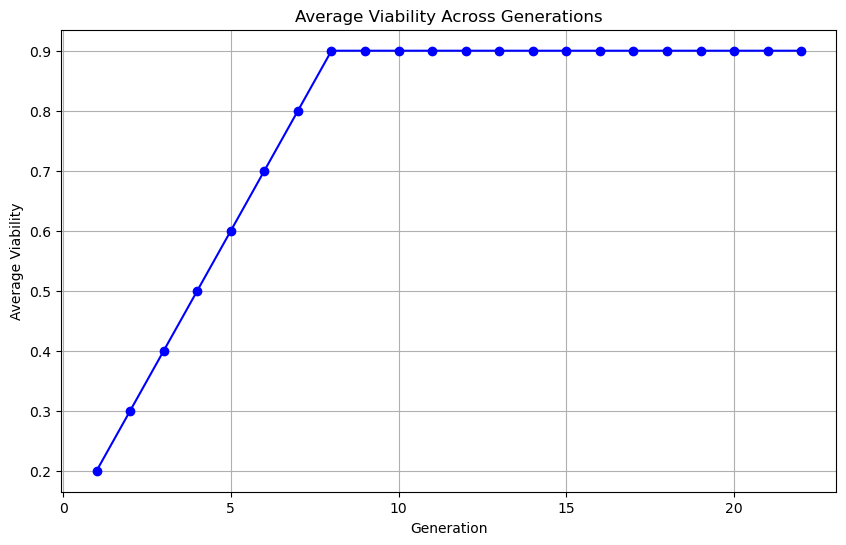

In [18]:
# Calculate the average viability for each generation
average_viabilities = [np.mean(gen) for gen in viabilities]

# Plot the average viability across generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(average_viabilities) + 1), average_viabilities, marker='o', linestyle='-', color='b')
plt.title('Average Viability Across Generations')
plt.xlabel('Generation')
plt.ylabel('Average Viability')
plt.grid(True)
plt.show()